In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [4]:
import streamlit as st

In [12]:
def fetch_student_data():
    """Fetches and combines the student performance datasets."""
    try:
        math_df = pd.read_csv('dirty/student-mat.csv', sep=';', index_col=0)
        port_df = pd.read_csv('dirty/student-por.csv', sep=';', index_col=0)
        for df in [math_df, port_df]:
            string_columns = df.select_dtypes(include=['object']).columns
            for col in string_columns:
                df[col] = df[col].str.replace('"', '').str.strip()
        math_df['subject'] = 'math'
        port_df['subject'] = 'portuguese'
        combined_df = pd.concat([math_df, port_df], axis=0)
        combined_df = combined_df.reset_index(drop=True)
        return combined_df
    except Exception as e:
        st.error(f"Error loading data: {str(e)}")
        return None

def clean_data(df):
    """Cleans the student data."""
    if df is None:
        return None

    try:
        cleaned_df = df.copy()
        grade_columns = ['G1', 'G2', 'G3']
        for col in grade_columns:
            cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
        numeric_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
        for col in numeric_columns:
            cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mean())
        categorical_columns = cleaned_df.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mode()[0])
        return cleaned_df
    except Exception as e:
        st.error(f"Error cleaning data: {str(e)}")
        return None


In [ ]:
def prepare_data(data):
    target = 'G3'

    #separate features and target var
    
    #dropped = data[target].values()
    X = data.drop(columns=[target])
    y = data[target]
    
    X = pd.get_dummies(X, drop_first=True)

    #print(X.shape)
    #print(y.shape)
    
    return X, y

In [52]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

In [68]:
def feature_selection(X, y):
    selector = SelectKBest(f_regression, k=10)
    X_selected = selector.fit_transform(X, y)
    return X_selected

In [69]:
def normalization(X):
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized

In [ ]:
data = fetch_student_data()
cleaned_data = clean_data(data)

X, y = prepare_data(cleaned_data)

#print(cleaned_data['G3'].shape)

X_selected = feature_selection(X, y)
X_normalized = normalization(X_selected)

#print(X_normalized.shape)

processed_data = pd.concat([pd.DataFrame(X_normalized), cleaned_data[['G3']]], axis=1)

(1044, 41)
(1044,)
(1044,)
(1044, 10)


Mean Squared Error: 2.92685974213978
Mean Absolute Error: 0.9319612080643708
R-squared Score: 0.810691795001647


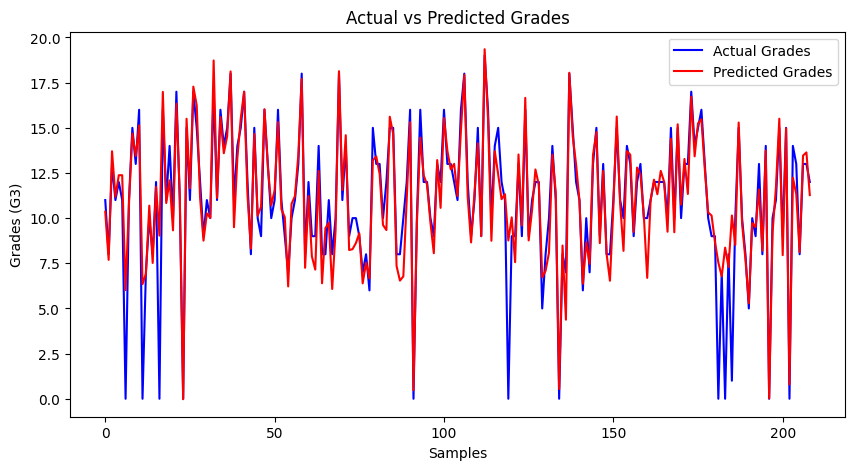

In [74]:
if processed_data is not None:
    #features = processed_data.drop(['G3', 'subject'], axis=1)
    features = processed_data.drop(['G3'], axis=1)
    labels = processed_data['G3']

    features = pd.get_dummies(features)

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared Score: {r2}")

    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual Grades", color="blue")
    plt.plot(y_pred, label="Predicted Grades", color="red")
    plt.xlabel("Samples")
    plt.ylabel("Grades (G3)")
    plt.title("Actual vs Predicted Grades")
    plt.legend()
    plt.show()

The R-squared score of 0.8107 indicates a strong potential for the model to correctly distinguish features and the target result. This means our model can accurately predict student grades based on given features. The R-squared score is monitored on a range from 0 to 1, with 1 being the highest value. The higher the R-squared score is, the stronger the model is. R-squared is a key indicator that the features and target prediction will correlate, but we must remember that is not causation. This is why to get to our conclusion of our dataset analysis, we will use other models to predict our result. Still, the value of about 0.81 as R-squared is extremely high for such data and emphasizes the strength of our Linear Regression model.

The MSE 

The MAE

Next, we hope to see if our Random Forest model or SVM models will provide a better model performance and more accurate results.